In [90]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

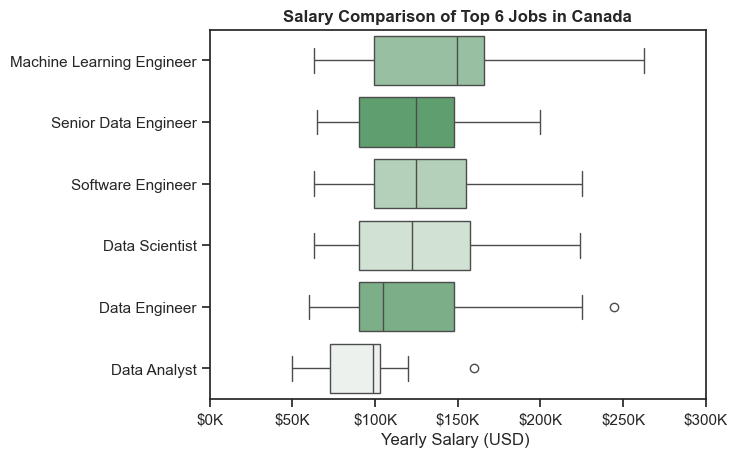

In [89]:
country = 'Canada'
df_CA = df[df['job_country'] == country].dropna(subset = ['salary_year_avg']).copy()
top_6 = df_CA['job_title_short'].value_counts().index[:6].to_list()
df_CA_plot = df_CA[df_CA['job_title_short'].isin(top_6)]
sorted_6 = df_CA_plot.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

sns.boxplot(data= df_CA_plot, x = 'salary_year_avg' , y = 'job_title_short' , hue= 'job_title_short', palette= 'light:g_r', order= sorted_6)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.xlabel('Yearly Salary (USD) ')
plt.ylabel('')
plt.title('Salary Comparison of Top 6 Jobs in Canada', fontweight = 'bold')
plt.show()


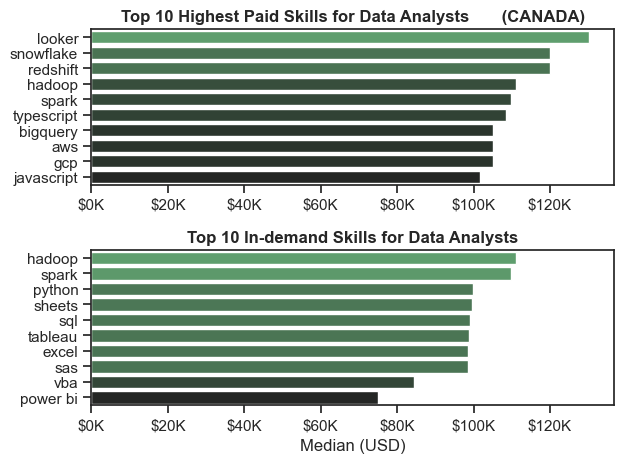

In [87]:
role = 'Data Analyst'
df_CA_2 = df_CA[df_CA['job_title_short'] == role]
df_CA_2_expo = df_CA_2.explode('job_skills')
df_CA_2_grp = df_CA_2_expo.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_highpay_skills = df_CA_2_grp.sort_values('median', ascending=False).head(10)
df_demand_skills = df_CA_2_grp.sort_values('count', ascending=False).head(10).sort_values('median', ascending=False)
plot_list = [df_highpay_skills, df_demand_skills]

fig , ax = plt.subplots(2,1)
sns.set_theme(style = 'ticks')

for i , dataf in enumerate(plot_list):
    sns.barplot(data= dataf, x = 'median', y = dataf.index , ax=ax[i], hue = 'median', palette= 'dark:g', legend = False)
    ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts       (CANADA)', fontweight = 'bold')
    ax[1].set_title('Top 10 In-demand Skills for Data Analysts', fontweight = 'bold')
    ax[0].set_xlabel('')
    ax[1].set_xlabel('Median (USD)')
    ax[i].set_ylabel('')
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
    ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
 

